# **Product Sales Forecasting: Data Cleaning, Preprocessing, Feature Engineering, and Machine Learning**

### *A Step-by-Step Approach to Forecast Sales for the Next 10 Days*

---

## **Objective:**
This notebook details the process of analyzing and forecasting product sales by:
- **Cleaning** and **preprocessing** raw sales data.
- Handling **missing values** and **outliers**.
- Performing **feature engineering** to create meaningful features.
- Conducting **visualizations** to understand data patterns and trends.
- Applying a **machine learning model** to predict future sales for the next 10 days.

---


### The following section of the notebook displays the methods of cleaning and understanding the dataset in order to get the most out of it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('sales.csv')

In [3]:
df.head()

,quantity,UnitePrice,discount,date,retail price,product_name,area,city
0,33,16.0,20.0,2021-10-29T03:33:52Z,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23T12:29:27Z,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03T09:14:16Z,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17T09:00:50Z,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06T19:57:02Z,45.0,product z,Miamy,North


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   quantity      2995 non-null   int64  
 1   UnitePrice    2995 non-null   float64
 2   discount      2995 non-null   float64
 3   date          2995 non-null   object 
 4   retail price  2995 non-null   float64
 5   product_name  2995 non-null   object 
 6   area          2970 non-null   object 
 7   city          2995 non-null   object 
dtypes: float64(3), int64(1), object(4)
memory usage: 187.3+ KB





Observations:

1. Missing Data: The area column has some missing values.
2. Date Column: The date column is in string format and needs to be converted to datetime for time series analysis.

In [5]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   quantity      2995 non-null   int64              
 1   UnitePrice    2995 non-null   float64            
 2   discount      2995 non-null   float64            
 3   date          2995 non-null   datetime64[ns, UTC]
 4   retail price  2995 non-null   float64            
 5   product_name  2995 non-null   object             
 6   area          2970 non-null   object             
 7   city          2995 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 187.3+ KB


In [7]:
# Display rows with missing values in the 'area' column
missing_area_rows = df[df['area'].isnull()]
missing_area_rows


,quantity,UnitePrice,discount,date,retail price,product_name,area,city
441,10,16.00,2.0,2022-06-25 23:09:55+00:00,16.00,product y,NaN,Giza
462,3,89.75,30.0,2022-03-24 00:51:49+00:00,99.00,product x,NaN,Giza
537,3,45.00,26.0,2022-02-28 14:04:52+00:00,45.00,product z,NaN,North
538,1,89.75,32.0,2022-03-02 13:51:20+00:00,89.75,product x,NaN,North
585,5,45.00,9.0,2022-02-08 12:11:46+00:00,45.00,product z,NaN,North
644,1,16.00,0.0,2022-02-28 15:06:21+00:00,16.00,product y,NaN,North
647,3,99.00,33.0,2022-10-10 08:16:46+00:00,99.00,product x,NaN,North
648,5,16.00,8.0,2022-12-22 09:06:13+00:00,16.00,product y,NaN,North
839,50,16.00,20.0,2022-03-05 16:59:51+00:00,16.00,product y,NaN,North
1088,25,16.00,20.0,2022-05-25 11:51:42+00:00,16.00,product y,NaN,North




There are a few common strategies to handle missing values:

a. Fill with a Default Value ("unknown") 

b. Fill with the Most Frequent Value (Mode)

c. Drop Missing Values 

d. Impute Based on Other Columns

The number of rows with missing data in the area column are 25 rows out of 2995 total rows in the dataset which encourages starategy "c" ; dropping them until further confirmation or restoration. Replacing them with "unknown" or the most frequent area might lead to inaccuracy.

In [ ]:
# Drop rows with missing values in 'area' column
# df = df.dropna(subset=['area'])
# df.info()




Mode Imputation (Most Common Value for the Same City) works well if the area has a strong relationship with the city 

In [8]:
# Impute missing 'area' values with the most common area for the same city
df['area'] = df.groupby('city')['area'].apply(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2995 entries, 0 to 2994
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   quantity      2995 non-null   int64              
 1   UnitePrice    2995 non-null   float64            
 2   discount      2995 non-null   float64            
 3   date          2995 non-null   datetime64[ns, UTC]
 4   retail price  2995 non-null   float64            
 5   product_name  2995 non-null   object             
 6   area          2995 non-null   object             
 7   city          2995 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(3)
memory usage: 187.3+ KB


Another method would include forward/backfilling but this might lead to missleading data.

In [9]:
# Get unique values of the 'area' column
unique_areas = df['area'].unique()

# Create a new DataFrame from the unique values
unique_areas_df = pd.DataFrame(unique_areas, columns=['area'])

# Print the DataFrame with unique 'area' values
print(unique_areas_df)

                 area
0              Bahary
1        Dar El-Salam
2               Miamy
3    Hadayek El-Kobba
4           Ain Shams
..                ...
65           El-Ayyat
66             Helwan
67  Boulaq El-Dakrour
68  Shoubra El-Kheima
69          Al-Khusus

[70 rows x 1 columns]


In [10]:
# Count the number of occurrences of 'Unknown' in the 'area' column
unknown_count = df['area'].value_counts().get('Unknown', 0)
print(f"Number of 'Unknown' entries in the area column: {unknown_count}")


Number of 'Unknown' entries in the area column: 0


In [11]:
# Check for duplicate rows
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")



Number of duplicate rows: 5


The dataset has 5 duplicate rows that need dropping.

In [12]:
df = df.drop_duplicates()


In [13]:
duplicates = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicates.shape[0]}")

Number of duplicate rows: 0


In [14]:
# Check for missing values in other columns
missing_values = df.isnull().sum()
print(missing_values)


quantity        0
UnitePrice      0
discount        0
date            0
retail price    0
product_name    0
area            0
city            0
dtype: int64


In [19]:
# Create new features and rename a column 
df.rename(columns={'retail price': 'retail_price'}, inplace=True)
df.rename(columns={'UnitePrice': 'unit_price'}, inplace=True)

df.head()


,quantity,unit_price,discount,date,retail_price,product_name,area,city
0,33,16.0,20.0,2021-10-29 03:33:52+00:00,16.0,product y,Bahary,North
1,30,16.0,20.0,2021-10-23 12:29:27+00:00,16.0,product y,Dar El-Salam,Cairo
2,2,45.0,30.0,2021-08-03 09:14:16+00:00,45.0,product z,Miamy,North
3,3,16.0,3.0,2021-08-17 09:00:50+00:00,16.0,product y,Miamy,North
4,1,45.0,27.0,2021-09-06 19:57:02+00:00,45.0,product z,Miamy,North


In [21]:
df['total_sales'] = df['quantity'] * df['unit_price']
df['discounted_price'] = df['unit_price'] - (df['unit_price'] * (df['discount'] / 100)) 
df.head(2)

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price
0,33,16.0,20.0,2021-10-29 03:33:52+00:00,16.0,product y,Bahary,North,528.0,12.8
1,30,16.0,20.0,2021-10-23 12:29:27+00:00,16.0,product y,Dar El-Salam,Cairo,480.0,12.8


Added a "total sales" and a "discounted price" column to the dataset

(P.S. in this notebook the "discount" value is assumed to be a percentage not a monetary value according to conclusions coming up next. in real world application it is advised to seek confirmation.)

In [22]:
df.describe()

,quantity,unit_price,discount,retail_price,total_sales,discounted_price
count,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000,2990.000000
mean,7.703344,60.567809,25.918425,59.623495,299.454682,41.965572
std,100.548991,35.268753,14.132043,36.943437,1737.231658,23.888207
min,1.000000,10.000000,-1.000000,0.000000,16.000000,-413.747500
25%,2.000000,16.000000,20.000000,16.000000,80.000000,15.840000
50%,3.000000,45.000000,31.000000,45.000000,135.000000,32.850000
75%,5.000000,99.000000,33.000000,99.000000,269.250000,65.340000
max,5000.000000,102.000000,561.000000,102.000000,80000.000000,81.600000


Boxplots help in visually spotting outliers 

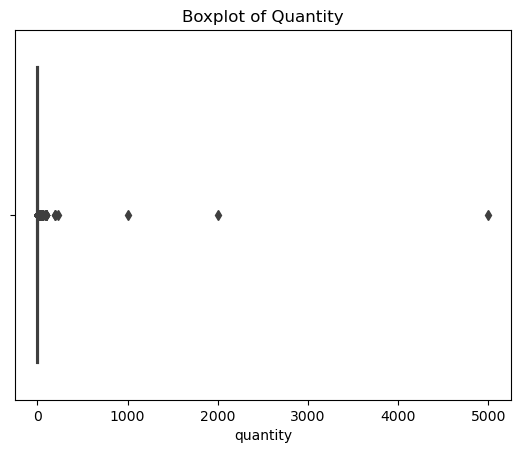

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'quantity' column
sns.boxplot(x=df['quantity'])
plt.title('Boxplot of Quantity')
plt.show()


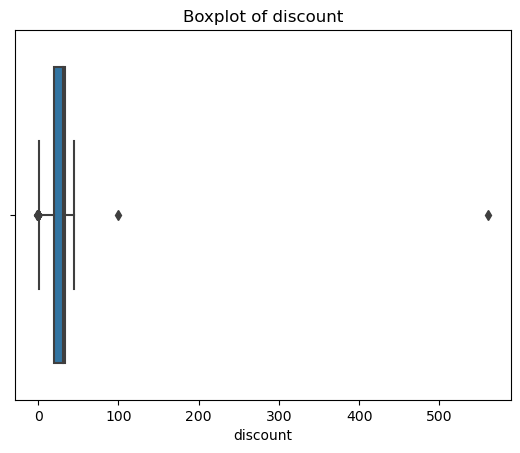

In [27]:
# Create a boxplot for the 'discount' column
sns.boxplot(x=df['discount'])
plt.title('Boxplot of discount')
plt.show()


Outlier values found in the "quantity" and "discount" columns.

In [24]:
# Display the rows with maximum values for quantity and discount
max_quantity = df['quantity'].max()
max_discount = df['discount'].max()
min_discount = df['discount'].min()

# Filter rows with max values
outliers_quantity = df[df['quantity'] == max_quantity]
outliers_discount = df[df['discount'] == max_discount]
outliers_discount_min = df[df['discount'] == min_discount]



In [25]:
outliers_quantity

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price
501,5000,16.0,1.0,2022-02-06 13:47:49+00:00,16.0,product y,El-Haram,Giza,80000.0,15.84


In [26]:
# Get the top 3 maximum values in the 'quantity' column
top_3_quantities = df['quantity'].nlargest(3)

# Print the top 3 maximum quantities
print("The top 3 maximum quantities are:")
print(top_3_quantities)


The top 3 maximum quantities are:
501    5000
18     2000
300    1000
Name: quantity, dtype: int64


In [28]:
# Get the top 2 maximum values in the 'discount' column
top_2_discounts = df['discount'].nlargest(2)

# Print the top 3 maximum quantities
print("The top 2 maximum discounts are:")
print(top_2_discounts)

The top 2 maximum discounts are:
1415    561.0
603     100.0
Name: discount, dtype: float64


In [29]:
outliers_discount

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price
1415,5,89.75,561.0,2022-06-21 14:52:02+00:00,99.0,product x,El-Mandara,North,448.75,-413.7475


In [30]:
outliers_discount_min

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price
927,2,16.0,-1.0,2022-02-22 12:25:53+00:00,16.0,product y,El-Seyouf,North,32.0,16.16


In [32]:
df = df.drop(outliers_discount_min.index)
df = df.drop(top_2_discounts.index)
df = df.drop(top_3_quantities.index)

df.describe()



,quantity,unit_price,discount,retail_price,total_sales,discounted_price
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,5.035188,60.632708,25.735620,59.683395,256.994889,42.169305
std,10.370852,35.252912,10.088967,36.930334,687.896739,22.372319
min,1.000000,10.000000,0.000000,0.000000,16.000000,8.400000
25%,2.000000,16.000000,20.000000,16.000000,80.000000,15.840000
50%,3.000000,45.000000,31.000000,45.000000,135.000000,32.850000
75%,5.000000,99.000000,33.000000,99.000000,269.250000,65.340000
max,232.000000,102.000000,45.000000,102.000000,20822.000000,81.600000


In [33]:
unique_products = df['product_name'].unique()
print(unique_products)

['product y' 'product z' 'product x ']


Checking for the unique values "products"

In [34]:
# Check the minimum and maximum values in the discount column
print("Discount Range:")
print(df['discount'].describe())


Discount Range:
count    2984.000000
mean       25.735620
std        10.088967
min         0.000000
25%        20.000000
50%        31.000000
75%        33.000000
max        45.000000
Name: discount, dtype: float64


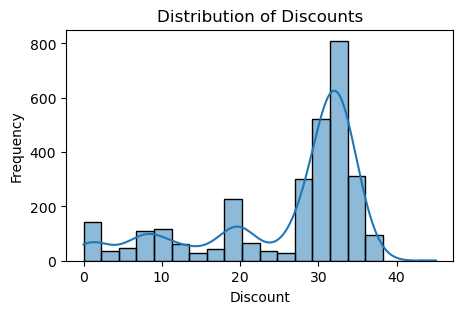

In [35]:
# Plot a histogram of the discount column
plt.figure(figsize=(5, 3))
sns.histplot(df['discount'], bins=20, kde=True)
plt.title('Distribution of Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.show()


this plot suggests that the values in the discount column represents a percentage not a monetary value.

In [37]:

df.info() 
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   quantity          2984 non-null   int64              
 1   unit_price        2984 non-null   float64            
 2   discount          2984 non-null   float64            
 3   date              2984 non-null   datetime64[ns, UTC]
 4   retail_price      2984 non-null   float64            
 5   product_name      2984 non-null   object             
 6   area              2984 non-null   object             
 7   city              2984 non-null   object             
 8   total_sales       2984 non-null   float64            
 9   discounted_price  2984 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 256.4+ KB


,quantity,unit_price,discount,retail_price,total_sales,discounted_price
count,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000,2984.000000
mean,5.035188,60.632708,25.735620,59.683395,256.994889,42.169305
std,10.370852,35.252912,10.088967,36.930334,687.896739,22.372319
min,1.000000,10.000000,0.000000,0.000000,16.000000,8.400000
25%,2.000000,16.000000,20.000000,16.000000,80.000000,15.840000
50%,3.000000,45.000000,31.000000,45.000000,135.000000,32.850000
75%,5.000000,99.000000,33.000000,99.000000,269.250000,65.340000
max,232.000000,102.000000,45.000000,102.000000,20822.000000,81.600000


In [38]:
df.head(3)

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price
0,33,16.0,20.0,2021-10-29 03:33:52+00:00,16.0,product y,Bahary,North,528.0,12.8
1,30,16.0,20.0,2021-10-23 12:29:27+00:00,16.0,product y,Dar El-Salam,Cairo,480.0,12.8
2,2,45.0,30.0,2021-08-03 09:14:16+00:00,45.0,product z,Miamy,North,90.0,31.5


### The next section in the notebook showcases some visualizations that help further understand what the dataset has to tell.

How frequently a certain quantity of products is bought:

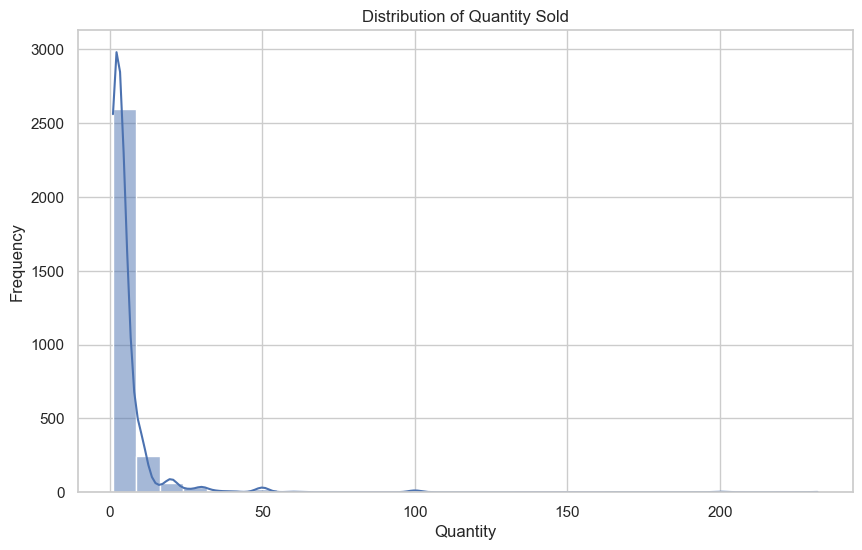

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(df['quantity'], bins=30, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()


Distribution of average discounts by area:

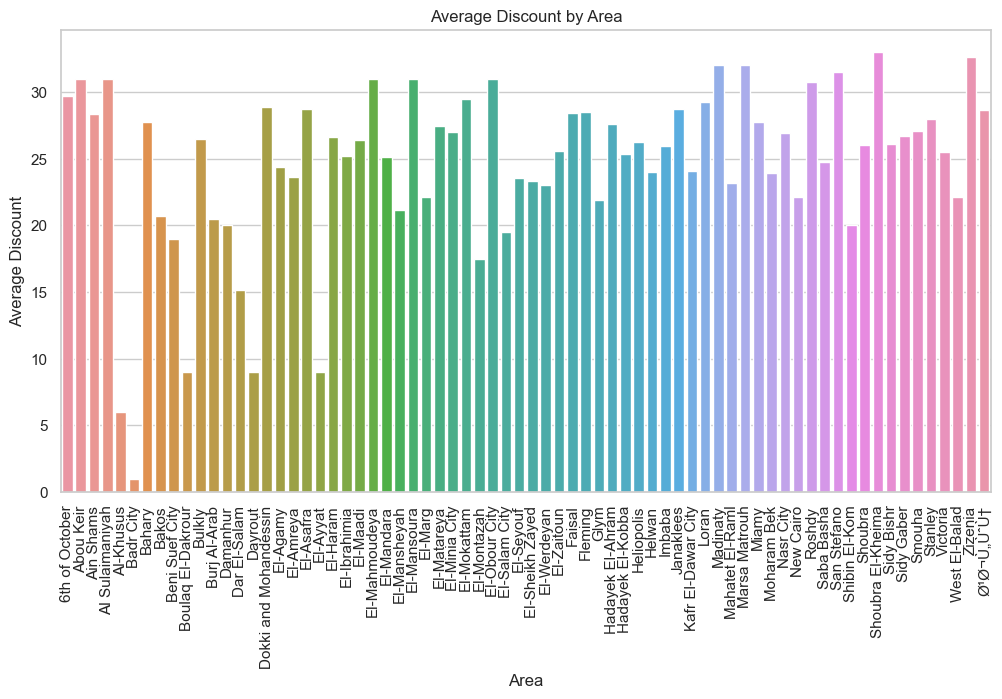

In [49]:
plt.figure(figsize=(12, 6))
average_discount = df.groupby('area')['discount'].mean().reset_index()
sns.barplot(data=average_discount, x='area', y='discount')
plt.title('Average Discount by Area')
plt.xlabel('Area')
plt.ylabel('Average Discount')
plt.xticks(rotation=90)
plt.show()


An unusual entry in the area column is spotted.

The following cell shows that regular areas are read as unsual entry which calls for the manual dropping of the single unusual entry.

In [53]:
# Create a DataFrame for unusual entries in the 'area' column
unusual_entries = df[~df['area'].str.match(r'^[A-Za-z\s]+$')]

# Count the number of unusual entries
unusual_count = unusual_entries.shape[0]
print(f"Number of unusual entries in the 'area' column: {unusual_count}")

# Display the DataFrame with unusual entries
print("Unusual entries in the 'area' column:")
print(unusual_entries)

Number of unusual entries in the 'area' column: 1542
Unusual entries in the 'area' column:
      quantity  unit_price  discount                      date  retail_price  \
1           30       16.00      20.0 2021-10-23 12:29:27+00:00          16.0   
9            9       89.75      31.0 2022-02-28 01:10:56+00:00          99.0   
10           1       16.00       1.0 2022-05-20 19:54:22+00:00          16.0   
11           2       16.00       1.0 2022-05-22 07:47:49+00:00          16.0   
35           5       99.00      34.0 2022-11-23 13:06:06+00:00          99.0   
...        ...         ...       ...                       ...           ...   
2965         2       99.00      34.0 2022-11-06 15:53:49+00:00          99.0   
2966         3       99.00      32.0 2022-11-30 21:34:52+00:00          99.0   
2981        60       16.00      20.0 2022-12-05 12:32:04+00:00          16.0   
2993         1       99.00      32.0 2022-11-26 09:16:45+00:00           0.0   
2994         2       99.00   

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2984 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   quantity          2984 non-null   int64              
 1   unit_price        2984 non-null   float64            
 2   discount          2984 non-null   float64            
 3   date              2984 non-null   datetime64[ns, UTC]
 4   retail_price      2984 non-null   float64            
 5   product_name      2984 non-null   object             
 6   area              2984 non-null   object             
 7   city              2984 non-null   object             
 8   total_sales       2984 non-null   float64            
 9   discounted_price  2984 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 321.0+ KB


In [55]:
# Remove specific unusual value from the 'area' column
df = df[df['area'] != "Ø¹Ø¬Ù„ÙˆÙ†"] 


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2981 entries, 0 to 2994
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   quantity          2981 non-null   int64              
 1   unit_price        2981 non-null   float64            
 2   discount          2981 non-null   float64            
 3   date              2981 non-null   datetime64[ns, UTC]
 4   retail_price      2981 non-null   float64            
 5   product_name      2981 non-null   object             
 6   area              2981 non-null   object             
 7   city              2981 non-null   object             
 8   total_sales       2981 non-null   float64            
 9   discounted_price  2981 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(3)
memory usage: 256.2+ KB


The unusual entry was repeated times. its always handy to double check on sheets using "find and replace"

This chart shows the distribution of total sales over the entire interval of time in the dataset:

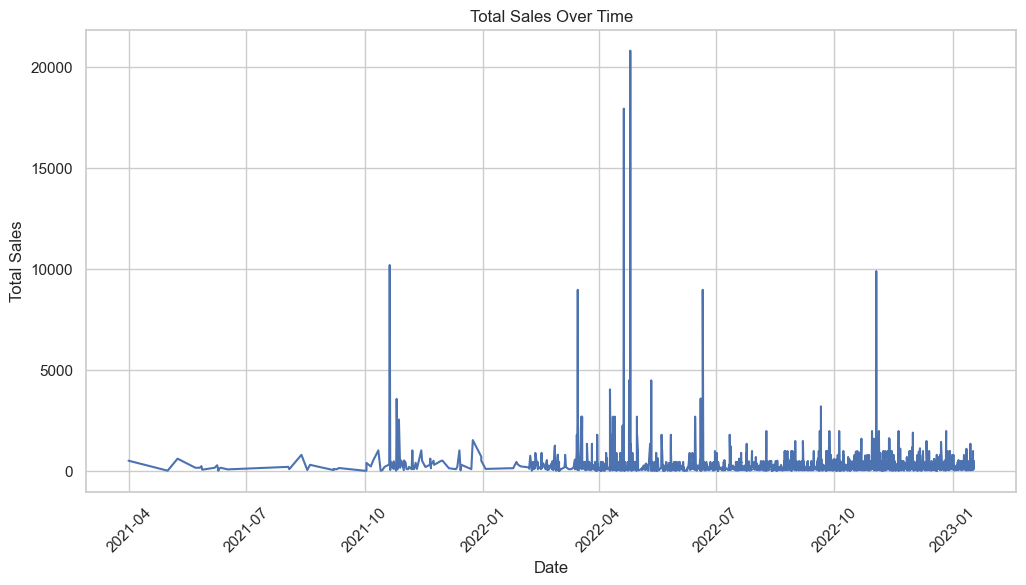

In [60]:
df.loc[:, 'date'] = pd.to_datetime(df['date'])

# Group by date and sum total sales
sales_over_time = df.groupby('date')['total_sales'].sum().reset_index()

# Plot the total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='date', y='total_sales')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


Top selling products in each area:

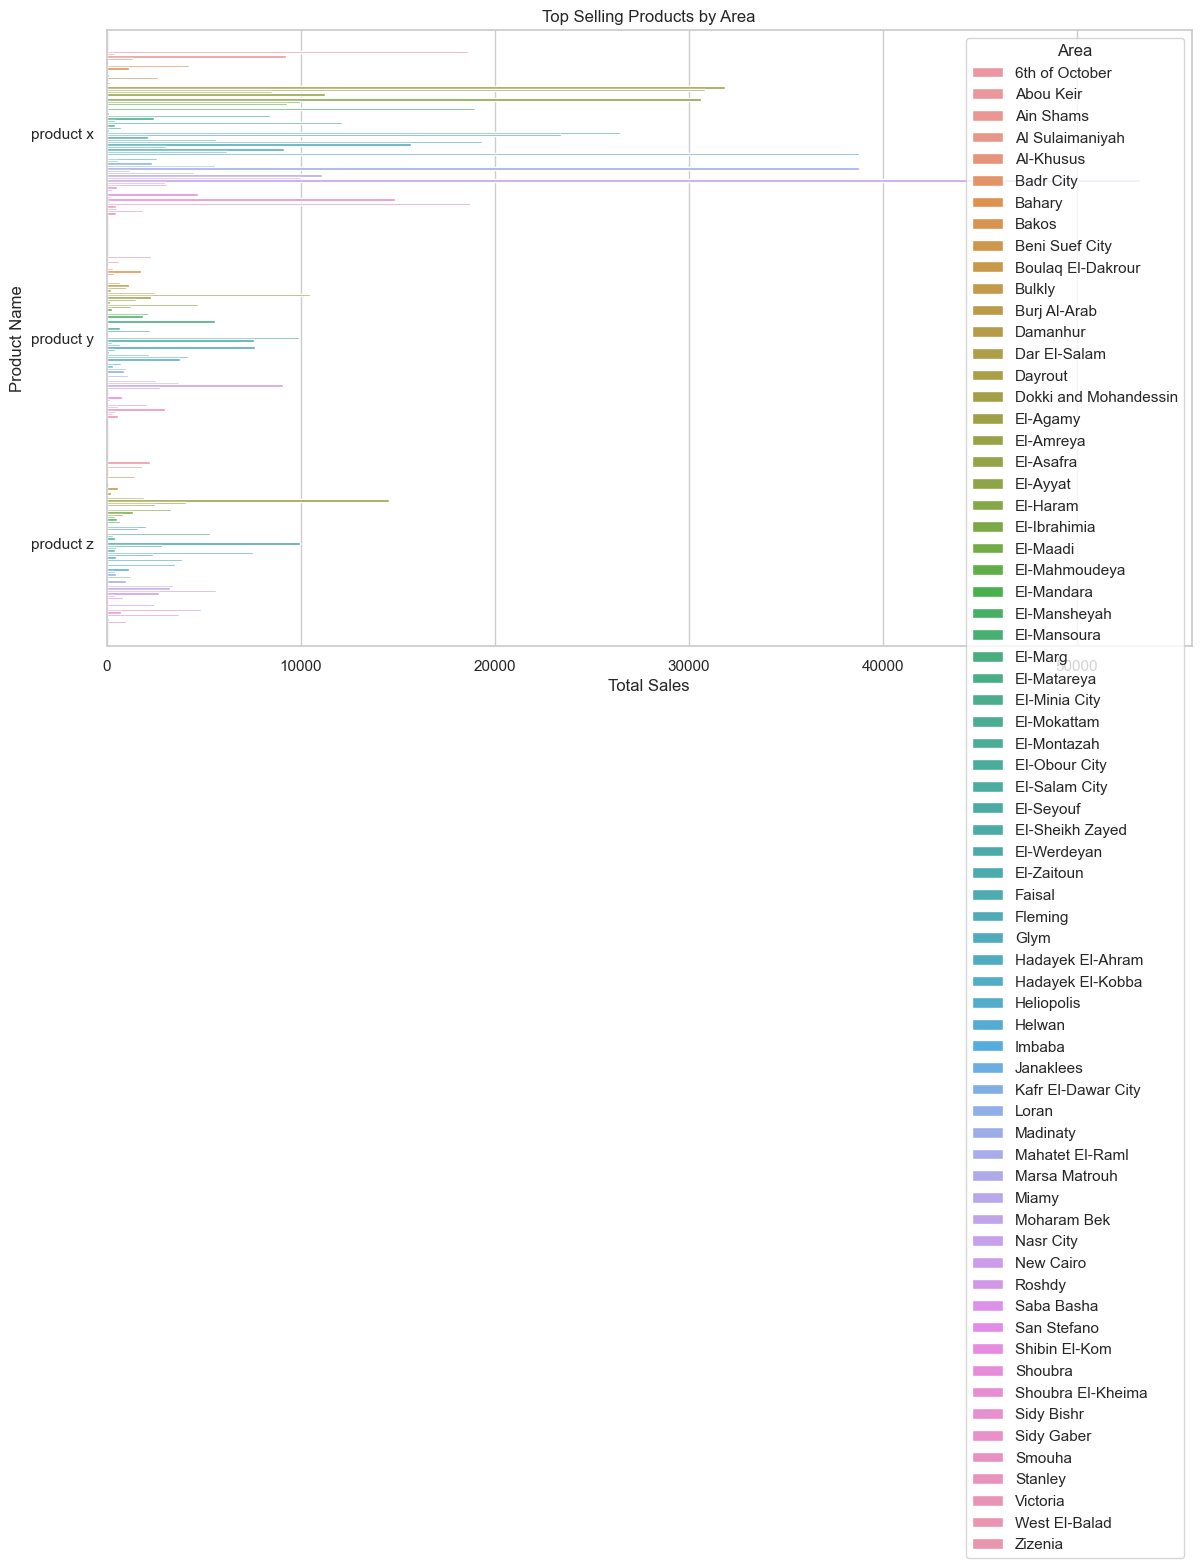

In [87]:
# Aggregate total sales by product name and area
top_products = df.groupby(['area', 'product_name'])['total_sales'].sum().reset_index()

# Sort within each area to get the top products
top_products_sorted = top_products.sort_values(['area', 'total_sales'], ascending=[True, False])

# Select top  products per area
top_products_per_area = top_products_sorted.groupby('area').head(5)

# Plot the top products for each area
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products_per_area, x='total_sales', y='product_name', hue='area')
plt.title('Top Selling Products by Area')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='Area')
plt.show()


Top selling products in each city:

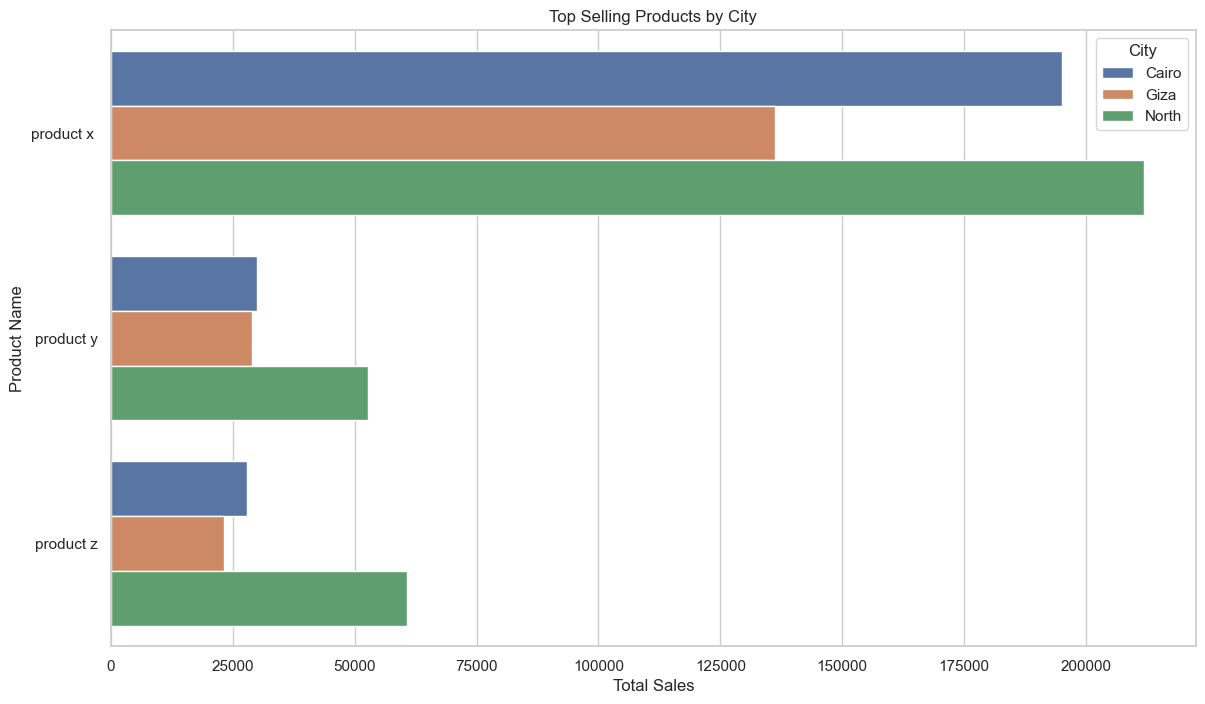

In [67]:
# Aggregate total sales by product name and city
top_products = df.groupby(['city', 'product_name'])['total_sales'].sum().reset_index()

# Sort within each city to get the top products
top_products_sorted = top_products.sort_values(['city', 'total_sales'], ascending=[True, False])

# Select top products per city
top_products_per_area = top_products_sorted.groupby('city').head(3)

# Plot the top 3 products for each area
plt.figure(figsize=(14, 8))
sns.barplot(data=top_products_per_area, x='total_sales', y='product_name', hue='city')
plt.title('Top Selling Products by City')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.legend(title='City')
plt.show()

Distribution of every product's sales in each area:

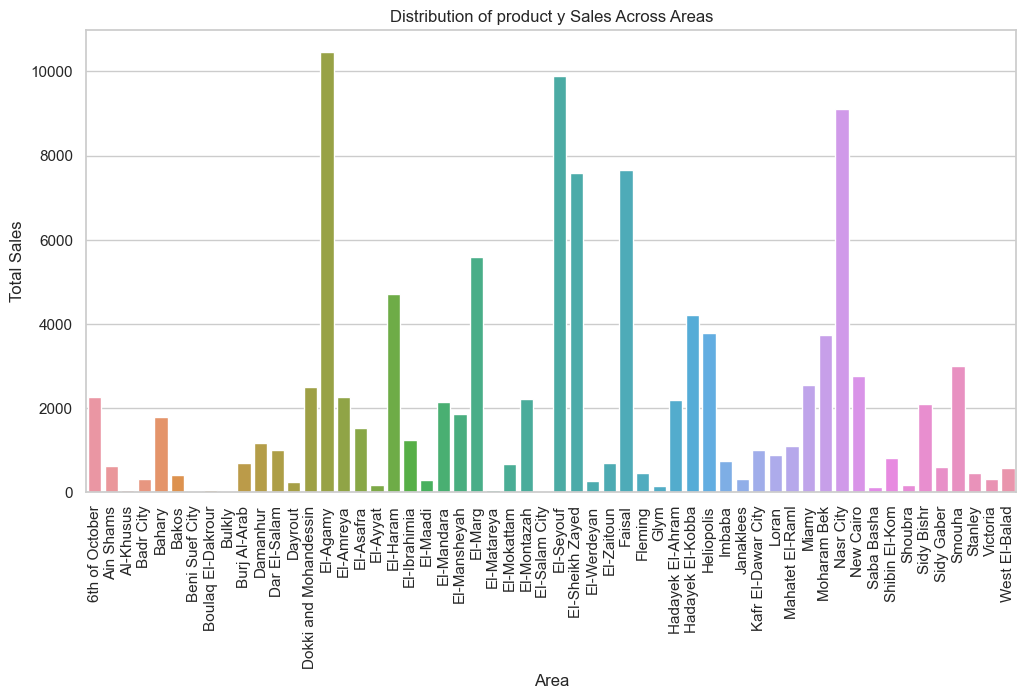

In [66]:
# Filter for a specific product
specific_product = 'product y'
product_sales_distribution = df[df['product_name'] == specific_product].groupby('area')['total_sales'].sum().reset_index()

# Plot the distribution of product sales across areas
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales_distribution, x='area', y='total_sales')
plt.title(f'Distribution of {specific_product} Sales Across Areas')
plt.xlabel('Area')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


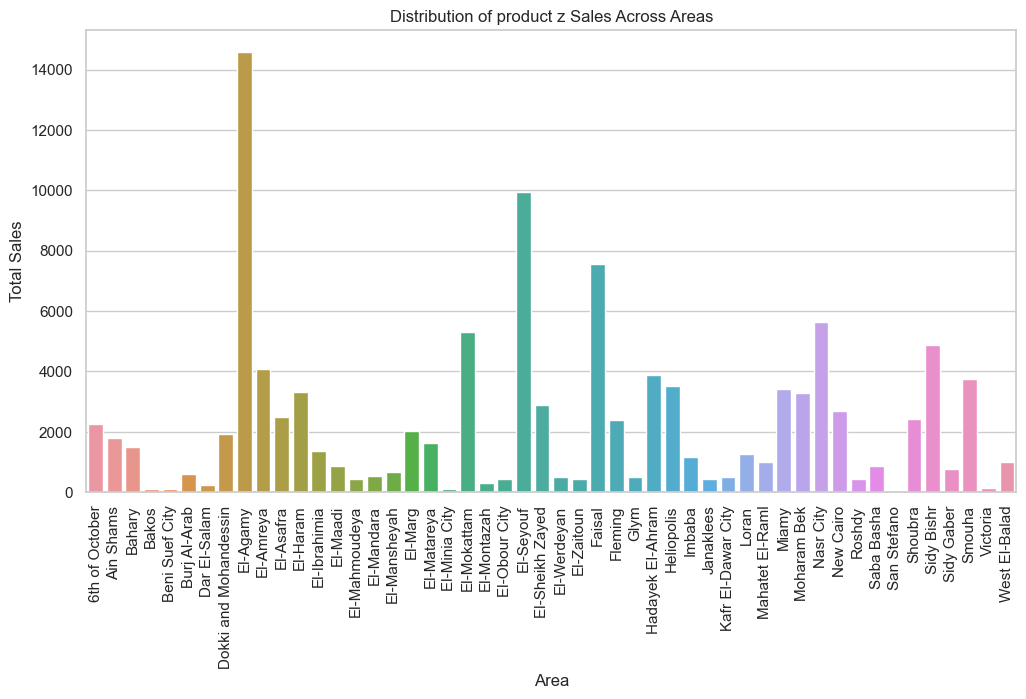

In [70]:
# Filter for a specific product
specific_product = 'product z'
product_sales_distribution = df[df['product_name'] == specific_product].groupby('area')['total_sales'].sum().reset_index()

# Plot the distribution of product sales across areas
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales_distribution, x='area', y='total_sales')
plt.title(f'Distribution of {specific_product} Sales Across Areas')
plt.xlabel('Area')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

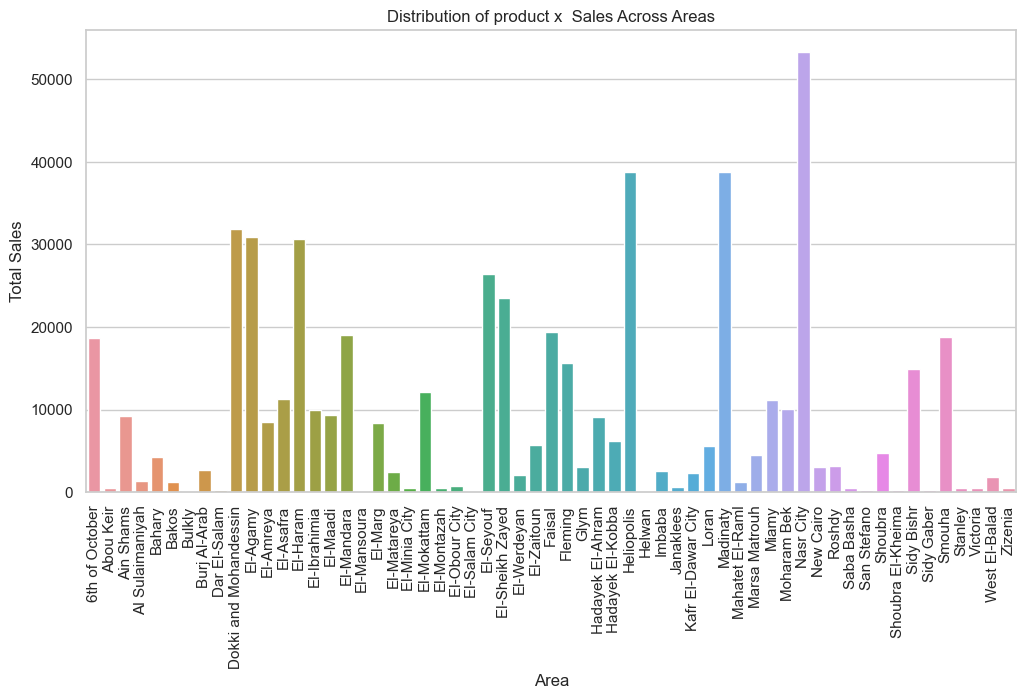

In [71]:
# Filter for a specific product
specific_product = 'product x '
product_sales_distribution = df[df['product_name'] == specific_product].groupby('area')['total_sales'].sum().reset_index()

# Plot the distribution of product sales across areas
plt.figure(figsize=(12, 6))
sns.barplot(data=product_sales_distribution, x='area', y='total_sales')
plt.title(f'Distribution of {specific_product} Sales Across Areas')
plt.xlabel('Area')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Product x has an extra " " 

Sales Trend of Top Products Over Time in Each Area:

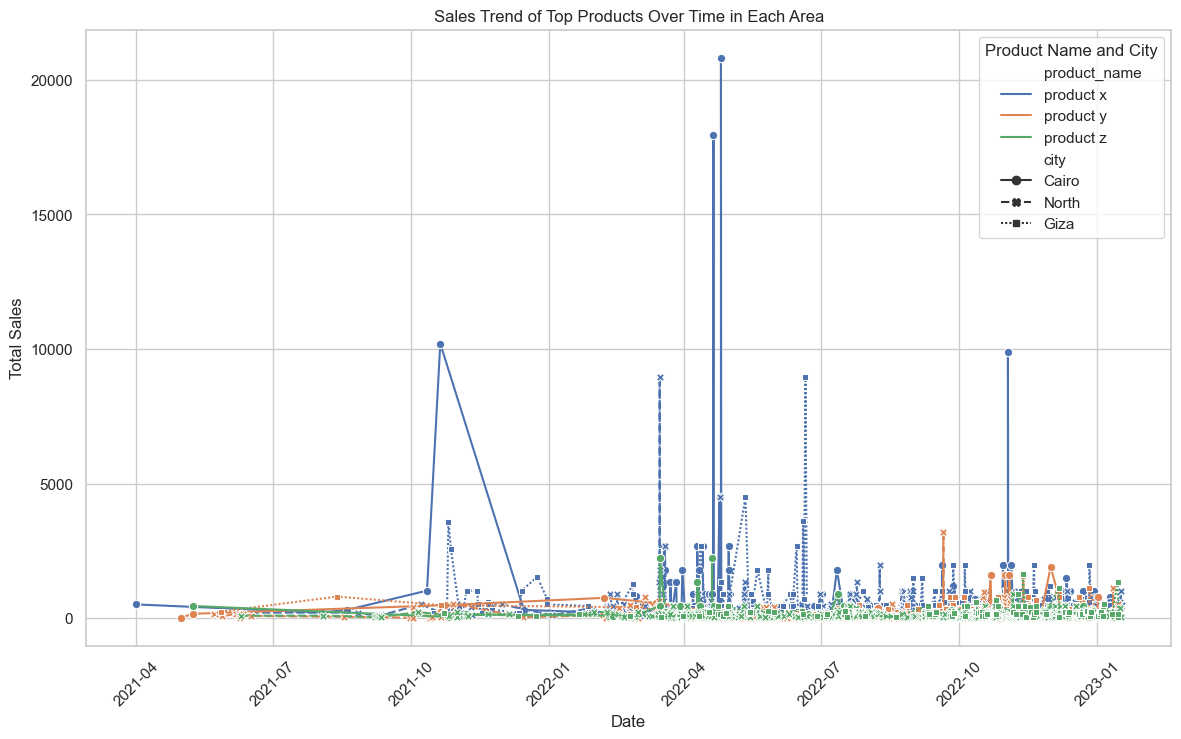

In [74]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date, city, and product_name, then sum total sales
sales_trend = df.groupby(['date', 'city', 'product_name'])['total_sales'].sum().reset_index()

# Filter for the top products for a specific city
top_products_area = sales_trend[sales_trend['product_name'].isin(['product x ', 'product y', 'product z'])]

# Plot the sales trends
plt.figure(figsize=(14, 8))
sns.lineplot(data=top_products_area, x='date', y='total_sales', hue='product_name', style='city', markers=True)
plt.title('Sales Trend of Top Products Over Time in Each Area')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend(title='Product Name and City')
plt.xticks(rotation=45)
plt.show()


Double checking that there are just the three unique values for "city"

In [75]:
unique_city = df['city'].unique()
print(unique_city)

['North' 'Cairo' 'Giza']


Adding another feature to the dataset.  

Reading sales data in respect to seasons will help provide a detailed picture

In [76]:
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Define a function to map each month to a season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the function to create a 'season' column
df['season'] = df['date'].apply(get_season)


In [77]:
df.head(5)

,quantity,unit_price,discount,date,retail_price,product_name,area,city,total_sales,discounted_price,season
0,33,16.0,20.0,2021-10-29 03:33:52+00:00,16.0,product y,Bahary,North,528.0,12.80,Fall
1,30,16.0,20.0,2021-10-23 12:29:27+00:00,16.0,product y,Dar El-Salam,Cairo,480.0,12.80,Fall
2,2,45.0,30.0,2021-08-03 09:14:16+00:00,45.0,product z,Miamy,North,90.0,31.50,Summer
3,3,16.0,3.0,2021-08-17 09:00:50+00:00,16.0,product y,Miamy,North,48.0,15.52,Summer
4,1,45.0,27.0,2021-09-06 19:57:02+00:00,45.0,product z,Miamy,North,45.0,32.85,Fall


Total Sales by Season and Product:

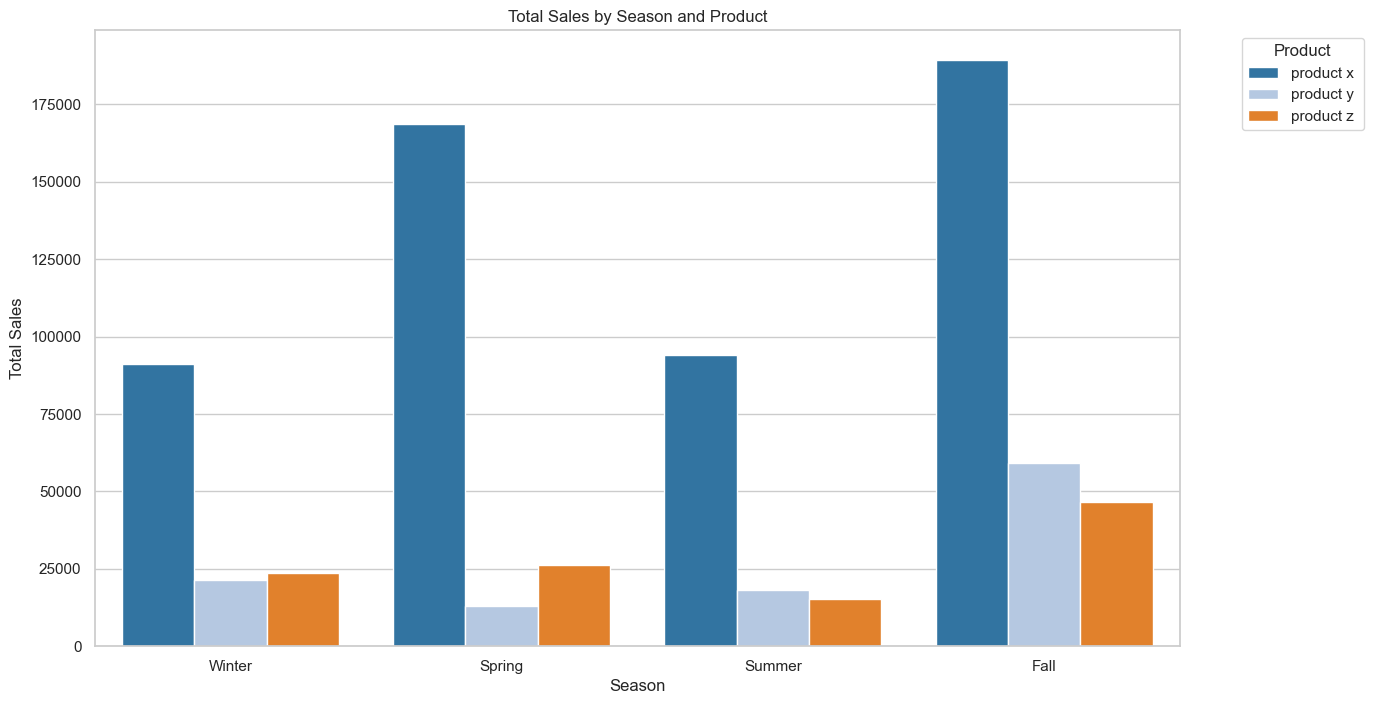

In [79]:
# Aggregate total sales by season and product
season_product_sales = df.groupby(['season', 'product_name'])['total_sales'].sum().reset_index()

# Sort the season column
season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_product_sales['season'] = pd.Categorical(season_product_sales['season'], categories=season_order, ordered=True)
season_product_sales = season_product_sales.sort_values('season')

# Plot total sales by season with products stacked
plt.figure(figsize=(14, 8))
sns.barplot(data=season_product_sales, x='season', y='total_sales', hue='product_name', palette='tab20')
plt.title('Total Sales by Season and Product')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Most selling product:

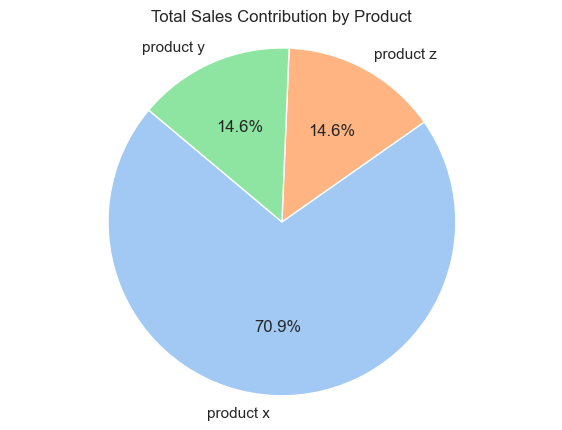

In [83]:
# Aggregate total sales by product
product_sales = df.groupby('product_name')['total_sales'].sum().reset_index()

# Sort products by total sales in descending order (optional)
product_sales = product_sales.sort_values('total_sales', ascending=False)

# Plot a pie chart of total sales by product
plt.figure(figsize=(7, 5))
plt.pie(product_sales['total_sales'], labels=product_sales['product_name'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Total Sales Contribution by Product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


In [86]:
# Remove leading and trailing whitespace from all entries in the 'product_name' column
df['product_name'] = df['product_name'].str.strip()

# Check if the extra spaces are removed
print(df['product_name'].unique())


['product y' 'product z' 'product x']


That was long overdue

In [89]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('cleaned_sales.csv', index=False)
